Weighted Degree (or Strength):

In a weighted network, the degree of a node is often referred to as the "weighted degree" or "strength" of the node. Instead of simply counting the number of edges connected to a node, the weighted degree takes into account the weights of these edges.
Mathematically, the weighted degree (S_i) of a node i is the sum of the weights of all edges incident to node i. If w_ij represents the weight of the edge between nodes i and j, then the weighted degree of node i can be expressed as the sum of wij for all j

Weighted Clustering Coefficient:

The traditional clustering coefficient measures the extent to which neighbors of a node are also connected to each other. In a weighted network, this concept can be extended by considering the weights of the edges in the local neighborhood of a node.
One way to define a weighted clustering coefficient for a node i is to consider the sum of the weights of the edges between its neighbors and normalize it by the sum of the weights of all possible edges between its neighbors.

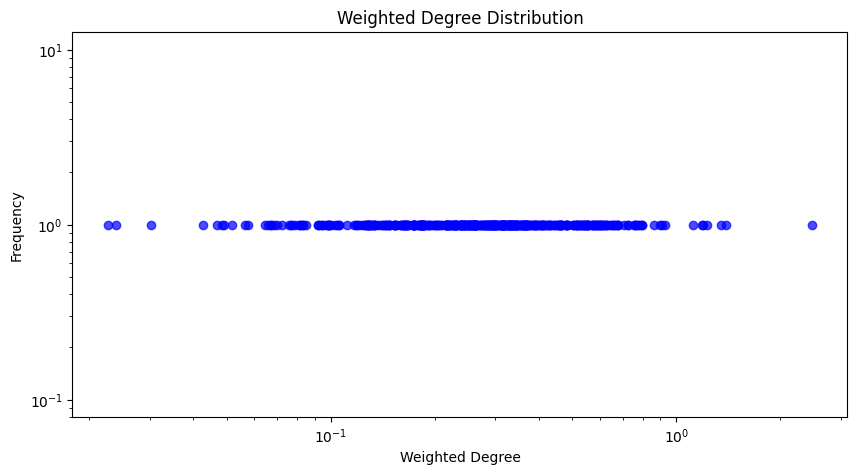

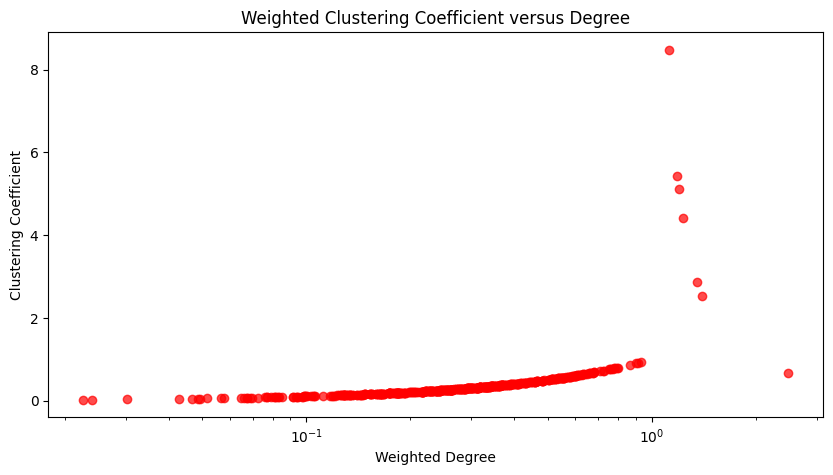

In [10]:
import matplotlib.pyplot as plt
from collections import defaultdict
import ast

def read_edgelist(file_path):
    edges = []
    with open(file_path, 'r') as file:
        reading_edges = False
        for line in file:
            if line[0] == '%':
                continue
            elif not reading_edges:
                reading_edges = True
                continue
            parts = line.strip().split(' ', 2)
            source_node, target_node, edge_data = int(parts[0]), int(parts[1]), ast.literal_eval(parts[2])
            edge = (source_node, target_node, edge_data['weight'])
            edges.append(edge)
    return edges

def compute_weighted_degree_distribution(edges):
    weighted_degrees = defaultdict(float)
    for edge in edges:
        weighted_degrees[edge[0]] += edge[2]
        weighted_degrees[edge[1]] += edge[2]

    weighted_degrees_values = list(weighted_degrees.values())
    degree_distribution = [weighted_degrees_values.count(deg) for deg in set(weighted_degrees_values)]
    return list(set(weighted_degrees_values)), degree_distribution

def compute_weighted_clustering_coefficient(edges):
    clustering_coefficients = defaultdict(float)
    degrees = defaultdict(float)

    for edge in edges:
        degrees[edge[0]] += edge[2]
        degrees[edge[1]] += edge[2]
        clustering_coefficients[edge[0]] += edge[2]
        clustering_coefficients[edge[1]] += edge[2]

    for node in degrees:
        if degrees[node] > 1:
            clustering_coefficients[node] /= (degrees[node] * (degrees[node] - 1))

    nodes, coefficients = zip(*clustering_coefficients.items())
    return list(degrees.values()), list(coefficients)

graph_edges = read_edgelist('congress.edgelist')

# Plot the weighted degree distribution
degrees, degree_distribution = compute_weighted_degree_distribution(graph_edges)
plt.figure(figsize=(10, 5))
plt.scatter(degrees, degree_distribution, marker='o', color='b', alpha=0.7)
plt.xscale('log')
plt.yscale('log')
plt.title('Weighted Degree Distribution')
plt.xlabel('Weighted Degree')
plt.ylabel('Frequency')
plt.savefig('degree_dist.png')
plt.show()
print()
# Plot the clustering coefficient versus degree
degrees, clustering_coefficients = compute_weighted_clustering_coefficient(graph_edges)
plt.figure(figsize=(10, 5))
plt.scatter(degrees, clustering_coefficients, marker='o', color='r', alpha=0.7)
plt.xscale('log')
plt.title('Weighted Clustering Coefficient versus Degree')
plt.xlabel('Weighted Degree')
plt.ylabel('Clustering Coefficient')
plt.savefig('clusteringcoeff_vs_degree.png')
plt.show()

P.S. The graphs may not be entirely visible in the pdf, kindly refer to the png files.